In [76]:
import sqlite3

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font='SimHei')

In [2]:
db_path = 'F:\pydata\dataset\CBDB_aw_20180831_sqlite.db'

In [3]:
sql = '''
SELECT *
FROM assoc_codes
-- WHERE c_assoc_desc_chn = '入元祐黨籍者'
'''

assoc = pd.read_sql(sql, con=sqlite3.connect(db_path))

In [4]:
assoc

,c_assoc_code,c_assoc_pair,c_assoc_pair2,c_assoc_desc,c_assoc_desc_chn,c_assoc_role_type,c_sortorder,c_example
0,-1,-1,NaN,[Missing Data],[缺乏信息],None,NaN,None
1,0,0,NaN,[Undefined],未詳,None,1.0,None
2,1,0,NaN,Listed in Yuanyou coalition register (元祐黨),入元祐黨籍者,A,109.0,None
3,2,0,NaN,Yuanfu coalition member (元符黨),元符上書入籍者,A,110.0,None
4,4,5,NaN,Patron of (= Client was),是Y的恩主,A,98.0,None
5,5,4,NaN,Patron was (= Client of),恩主是Y,P,99.0,None
6,7,8,NaN,Coalition member of,黨羽為Y,P,92.0,None
7,8,7,NaN,Coalition leader of,黨魁為Y,A,91.0,None
8,9,9,NaN,Friend of,友,M,20.0,None
9,10,10,NaN,Friend in the same graduating class,同年友,M,207.0,None


In [47]:
sql = '''
SELECT a.c_personid
    , b1.c_name_chn person_a
    , c_assoc_id
    , b2.c_name_chn person_b
    , a.c_assoc_code
    , c.c_assoc_desc_chn assoc
FROM assoc_data a
LEFT JOIN biog_main b1 
    ON a.c_personid = b1.c_personid
LEFT JOIN biog_main b2 
    ON a.c_assoc_id = b2.c_personid
LEFT JOIN assoc_codes c 
    ON a.c_assoc_code = c.c_assoc_code
WHERE (a.c_personid = '3257' 
    OR c_assoc_id = '3257')
    -- OR a.c_personid IN (SELECT c_personid FROM assoc_data WHERE c_assoc_id = '3257')
    --OR a.c_assoc_id IN (SELECT c_assoc_id FROM assoc_data WHERE c_personid = '3257')
    AND a.c_assoc_code IN ('429', '430', '431', '432', '433', '434', '435', '436')
'''

person_assoc = pd.read_sql(sql, con=sqlite3.connect(db_path))

In [48]:
for i in person_assoc['assoc'].unique():
    print(i)

致書Y
被致書由Y
答Y書
收到Y的答書
答Y啓
收到Y的答啓


In [49]:
person_assoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 6 columns):
c_personid      1260 non-null int64
person_a        1260 non-null object
c_assoc_id      1260 non-null int64
person_b        1260 non-null object
c_assoc_code    1260 non-null int64
assoc           1260 non-null object
dtypes: int64(3), object(3)
memory usage: 59.1+ KB


In [50]:
person_assoc.groupby('person_a').count().sort_values(['c_personid'], ascending=False).head()

,c_personid,c_assoc_id,person_b,c_assoc_code,assoc
person_a,,,,,
朱熹,631,631,631,631,631
張栻,22,22,22,22,22
陳亮,15,15,15,15,15
陳俊卿,13,13,13,13,13
呂祖謙,11,11,11,11,11


In [51]:
person_G = nx.from_pandas_edgelist(person_assoc, source='person_a', target='person_b', edge_attr='assoc')

In [52]:
print(nx.info(person_G))
print('Density: {0}'.format(nx.density(person_G)))

Name: 
Type: Graph
Number of nodes: 381
Number of edges: 380
Average degree:   1.9948
Density: 0.005249343832020997


In [53]:
person_assoc[(person_assoc['person_a'] == '朱熹') | (person_assoc['person_b'] == '朱熹')].count()

c_personid      1260
person_a        1260
c_assoc_id      1260
person_b        1260
c_assoc_code    1260
assoc           1260
dtype: int64

In [55]:
person_betweenness = pd.Series(nx.betweenness_centrality(person_G), name='Betweenness')
person_person = pd.Series.to_frame(person_betweenness)
person_person['Closeness'] = pd.Series(nx.closeness_centrality(person_G))
person_person['PageRank'] = pd.Series(nx.pagerank_scipy(person_G))
desc_betweenness = person_person.sort_values('Betweenness', ascending=False)
print('Top Highest Betweenness Centrality Persons')
desc_betweenness.head(25)

Top Highest Betweenness Centrality Persons


,Betweenness,Closeness,PageRank
朱熹,1.0,1.000000,0.459755
游九言,0.0,0.500659,0.001422
高宗商,0.0,0.500659,0.001422
毛壽朋,0.0,0.500659,0.001422
葉味道,0.0,0.500659,0.001422
王時敏,0.0,0.500659,0.001422
陳鞏,0.0,0.500659,0.001422
王阮,0.0,0.500659,0.001422
王子俊,0.0,0.500659,0.001422
杜斿,0.0,0.500659,0.001422


In [61]:
#pos = nx.circular_layout(person_G)
pos = nx.kamada_kawai_layout(person_G)
#pos = nx.shell_layout(person_G)
#pos = nx.spring_layout(person_G)
#pos = nx.random_layout(person_G)

In [66]:
def draw_graph(dataframe, metric):
    nodes = dataframe.index.values.tolist()
    edges = nx.to_edgelist(person_G)
    metric_G = nx.Graph()
    metric_G.add_nodes_from(nodes)
    metric_G.add_edges_from(edges)
    labels = {}

    for node in nodes[:25]:
        labels[node] = node
    plt.figure(1, figsize=(32, 32))

    nx.draw(metric_G, pos=pos, node_size=16, node_color='#8c8c8c', with_labels=False)
    nx.draw_networkx_nodes(metric_G, pos=pos, nodelist=nodes[:25], node_color='#a8071a', nodesize=16)
    nx.draw_networkx_nodes(metric_G, pos=pos, nodelist=nodes[25:], node_color='#8c8c8c', nodesize=16)
    nx.draw_networkx_edges(metric_G, pos=pos, edgelist=edges, arrows=False)
    tmp = nx.draw_networkx_labels(metric_G, pos=pos, labels=labels, font_size=28, font_color='#0050b3')

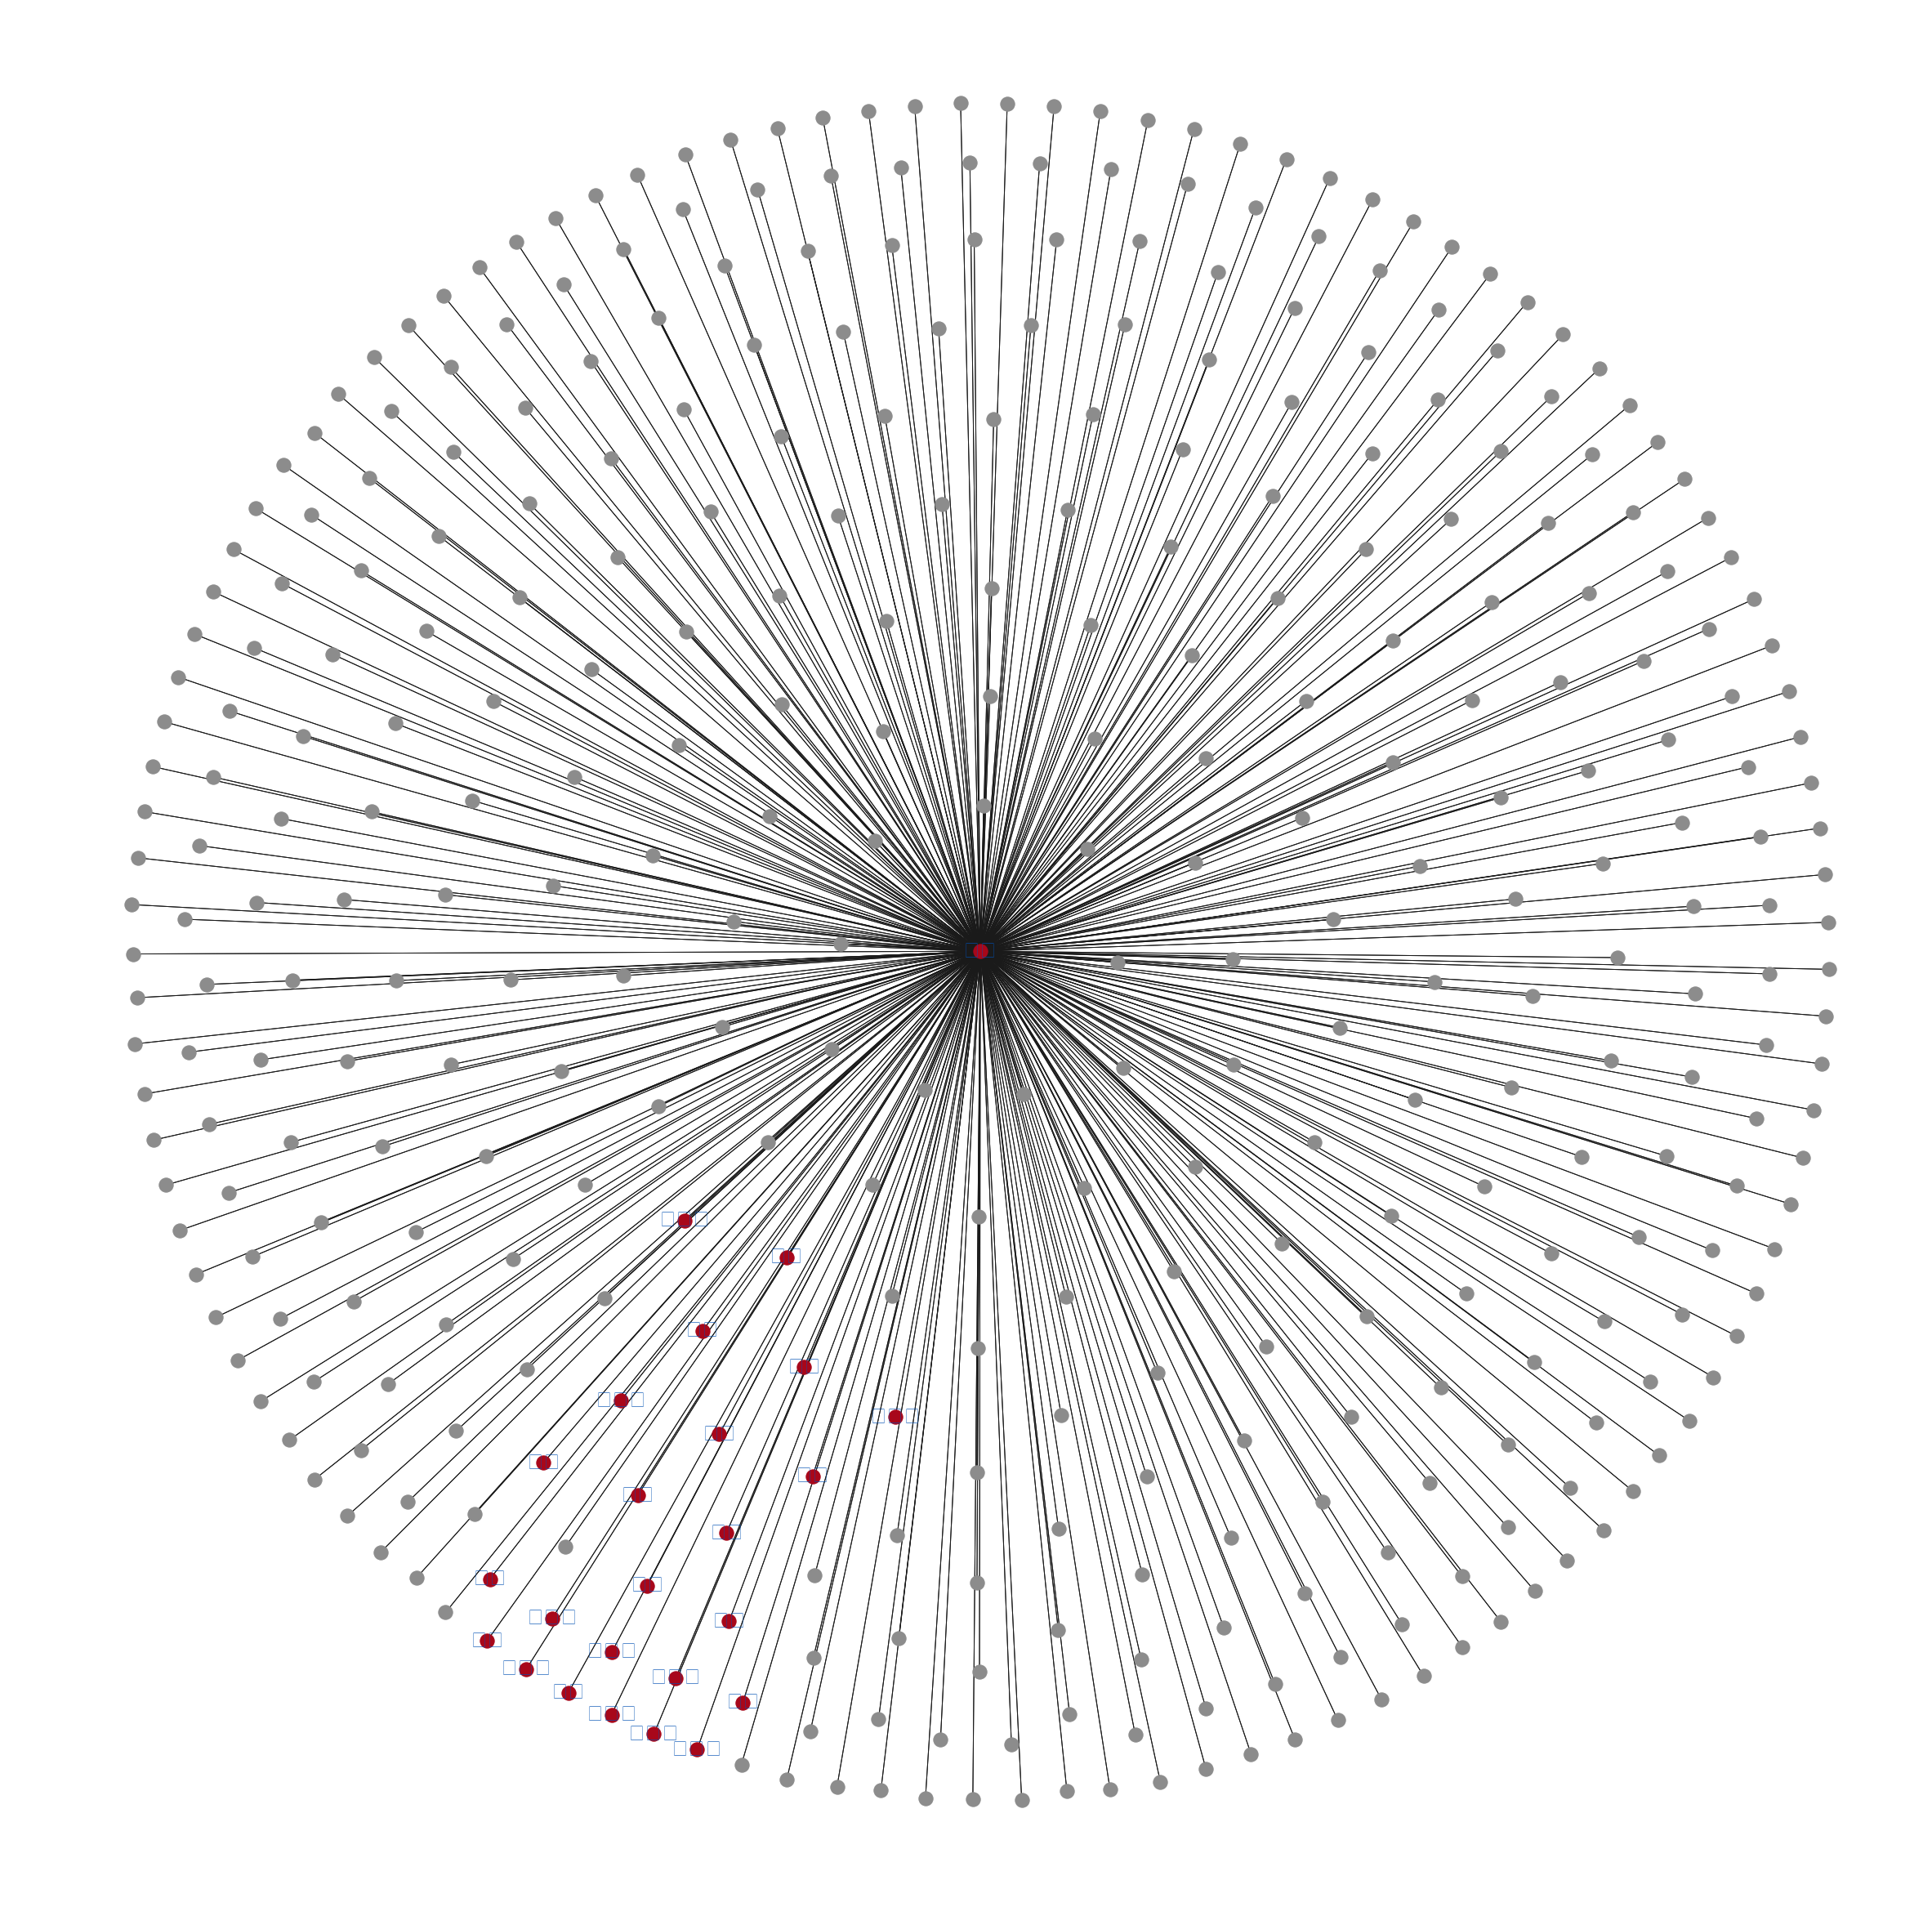

In [71]:
draw_graph(desc_betweenness, 'Betweenness')

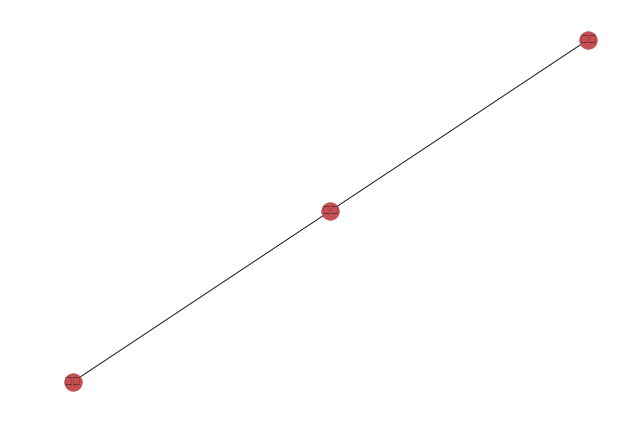

In [77]:
g=nx.Graph()
g.add_edge('张三','李四')
g.add_edge('张三','王五')
nx.draw(g,with_labels=True)
plt.show()